<a href="https://colab.research.google.com/github/pranukrish/CMPE258_DeepLearning/blob/main/Assignment1-a/BlackBoxDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-1 Part-1
 
#Black Box Deep Learning - FastAI

Installing libraries

In [1]:
pip install torch==1.10.0+cpu torchvision==0.11.1+cpu torchaudio==0.10.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.1+cu116
    Uninstalling torchaudio-0.13.1+cu116:
      Successfully uninstalled torchaudio-0.13.1+cu116
ERROR: pip's dependency resolver doe

In [ ]:
!pip install fastai

In [2]:
!pip install fastai==2.0.15

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 KB 7.2 MB/s eta 0:00:00
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.10
    Uninstalling fastai-2.7.10:
      Successfully uninstalled fastai-2.7.10


In [3]:
!pip install fastbook --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 14.3 MB/s eta 0:00:00
  Attempting unins

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Image classification using cnn_learner

Dataset link: https://www.robots.ox.ac.uk/~vgg/data/pets/

In [5]:
from fastai.vision.all import *

In [6]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [8]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.137778,0.023642,0.008119,33:39


In [9]:
is_cat,_,probs = learn.predict('/content/drive/MyDrive/Data/cat_picture.jpg')
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [10]:
is_cat,_,probs = learn.predict('/content/drive/MyDrive/Data/dog_picture.jpg')
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000508


#Segmentation with unet_learner

In [11]:
path = untar_data(URLs.CAMVID_TINY) # camvid dataset
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [12]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(1)

epoch,train_loss,valid_loss,time
0,3.082035,2.230415,01:17


epoch,train_loss,valid_loss,time
0,2.068935,1.783777,01:29


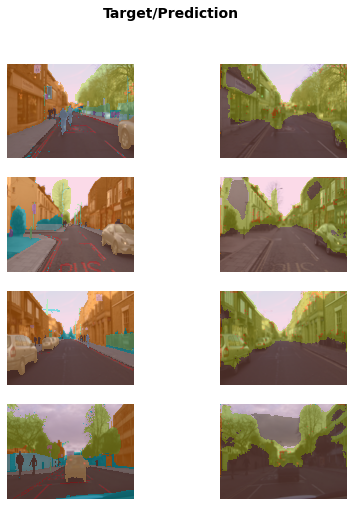

In [13]:
learn.show_results(max_n=4, figsize=(7,8))

#Sentiment analysis using text_classifier_learner

Data Source: 
https://www.kaggle.com/code/razamh/covid-19-tweets-analysis-using-nlp-python/data?select=Corona_NLP_train.csv

In [15]:
from fastai.text.all import *
import pandas as pd

In [14]:
df = pd.read_csv("/content/drive/MyDrive/Data/Corona_NLP_train.csv", usecols = ['OriginalTweet', 'Sentiment'], encoding = 'latin1')
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [16]:
dls_lm = TextDataLoaders.from_df(df, 
                                 text_col = 'OriginalTweet', 
                                 label_col = 'Sentiment', 
                                 valid_pct = 0.20, 
                                 bs = 64, 
                                 is_lm = True)
     

In [17]:
dls_lm.show_batch(max_n = 1)

,text,text_
0,"xxbos xxmaj we working hard for the safety of our customers and have introduced a xxunk xxmaj online shopping service , delivering our merchandise , xxunk xxunk @woolworths_sa , @picknpay and xxunk purchases # flattenthecurve of # corona # coronavirus # covid_19 # stayhome https : / / t.co / xxunk xxbos xxmaj can we just take a minute to appreciate the hard work and stress all the panic buyers are putting","xxmaj we working hard for the safety of our customers and have introduced a xxunk xxmaj online shopping service , delivering our merchandise , xxunk xxunk @woolworths_sa , @picknpay and xxunk purchases # flattenthecurve of # corona # coronavirus # covid_19 # stayhome https : / / t.co / xxunk xxbos xxmaj can we just take a minute to appreciate the hard work and stress all the panic buyers are putting the"


In [18]:
learn_text_language = language_model_learner(dls_lm, AWD_LSTM, drop_mult = 0.3)

In [ ]:
learn_text_language.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,time


In [ ]:
learn_text_language.save_encoder('finetuned')

In [ ]:
dls_clas = TextDataLoaders.from_df(df, 
                        valid_pct = 0.2, 
                        text_col = 'OriginalTweet',
                        label_col = 'Sentiment', 
                        bs = 64, 
                        text_vocab = dls_lm.vocab)

In [ ]:
learn_text = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult = 0.5, metrics = accuracy).to_fp16()# load our saved encoder
learn_text = learn_text.load_encoder('finetuned')

In [ ]:
learn_text.lr_find()

In [ ]:
learn_text.fit_one_cycle(1, 2e-3)

In [ ]:
learn_text.predict('I have been infected with covid and its not good')

#Decisiontree using tabular_learner

In [ ]:
pip install fastai==1.0.58

In [ ]:
import pandas as pd
from fastai import *
from fastai.tabular import *
from fastai.tabular.data import *

In [ ]:
# load Data
train = pd.read_csv("/content/drive/MyDrive/Dataset/HousePricePrediction/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Dataset/HousePricePrediction/test.csv")

In [ ]:
test_id = test['Id']
test.fillna(value = test.mean(), inplace = True)

train.head()

In [ ]:
dep_var = 'SalePrice'
# cat_names = train.select_dtypes(include=['object']).columns.tolist()
cat_names = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
             'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
             'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
             'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
             'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
             'MSSubClass', 'OverallQual', 'OverallCond','BsmtFullBath',
              'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces','GarageCars','YrSold' , 'MoSold', 'LowQualFinSF' , 'PoolArea', 
             'YearBuilt', 'YearRemodAdd' , 'MiscVal', '3SsnPorch']


In [ ]:
# cont_names = train.select_dtypes(include=[np.number]).columns.tolist()
cont_names = [  'LotFrontage', 'LotArea',  
               'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
              'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']

In [ ]:
print("Categorical columns are : ", cat_names)
print('Continuous numerical columns are :', cont_names)

In [ ]:
procs = [FillMissing, Categorify, Normalize]

In [ ]:
# Test tabularlist
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [ ]:
# Train data bunch
data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_rand_pct(valid_pct = 0.1, seed = 42)
                        .label_from_df(cols = dep_var, label_cls = FloatList, log = True )
                        .add_test(test)
                        .databunch())

In [ ]:
data.show_batch(rows = 10)

In [ ]:
# Create deep learning model
learn_tabular = tabular_learner(data, layers=[200,100], metrics=rmse)

# select the appropriate learning rate
learn_tabular.lr_find()

# we typically find the point where the slope is steepest
learn_tabular.recorder.plot()

# Fit the model based on selected learning rate
learn_tabular.fit_one_cycle(1, max_lr =1e-01)

In [ ]:
# get predictions
preds, targets = learn_tabular.get_preds(DatasetType.Test)
labels = [np.exp(p[0].data.item()) for p in preds]
labels

#Ranking using collab_learner

In [ ]:
pip install fastai==1.0.58

In [ ]:
from fastai.collab import *
from fastai.tabular import *
from fastai.basics import *
from fastai.collab import CollabDataBunch, collab_learner

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Dataset/Song Dataset/songsDataset.csv')
ratings.head()

In [ ]:
ratings.columns = ['userID', 'songID', 'rating']

In [ ]:
ratings['rating'].value_counts()

In [ ]:
data = CollabDataBunch.from_df(ratings, seed=42, valid_pct=0.2)

In [ ]:
data.show_batch()

In [ ]:
y_range = [0.5,5.5]

In [ ]:
learn_collab = collab_learner(data, n_factors=50, y_range=y_range, wd=1e-1)

In [ ]:
learn_collab.lr_find()
learn_collab.recorder.plot(skip_end=15)

In [ ]:
learn_collab.fit_one_cycle(1, 1e-01)

In [ ]:
learn_collab.show_results()